# Detection of parked cars in the city of Granada.
## Image segmentation using deep learning techniques.
### Notebook 5: GranadaAerial Dataset Preview.

### Authors:
- **Luis Crespo Orti**
- **Isabel María Moreno Cuadrado**
- **Pablo Olivares Martínez**
- **Ximo Sanz Tornero**

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import random
import os

from PIL import Image

def extract_number(filename):
    """Extracts the number from a file name in the format 'granada{N}.ext'."""
    basename = os.path.splitext(filename)[0]  # Remove the extension
    number = int(basename.replace('granada', ''))  # Remove the prefix and convert to an integer
    return number

def overlay_masks(src_folder, gt_folder, transparency=0.5):
    src_files = sorted(os.listdir(src_folder), key=extract_number)
    gt_files = sorted(os.listdir(gt_folder), key=extract_number)

    # Ensure both folders contain at least 10 files
    if len(src_files) < 10 or len(gt_files) < 10:
        print("Both folders must contain at least 10 files.")
        return

    # Take 10 random non-repeating indices from both lists
    random_indices = random.sample(range(len(src_files)), 10)

    for index in random_indices:
        src_file = src_files[index]
        gt_file = gt_files[index]

        src_file_path = os.path.join(src_folder, src_file)
        gt_file_path = os.path.join(gt_folder, gt_file)

        with Image.open(src_file_path) as src_img, Image.open(gt_file_path) as gt_img:
            # Ensure the mask has an alpha channel for transparency
            gt_img = gt_img.convert("RGBA")

            # Create a transparent image for the mask
            transparent_gt = Image.new("RGBA", gt_img.size)
            for x in range(gt_img.width):
                for y in range(gt_img.height):
                    r, g, b, a = gt_img.getpixel((x, y))
                    transparent_gt.putpixel((x, y), (r, g, b, int(a * transparency)))

            # Combine original image and transparent mask
            combined = Image.alpha_composite(src_img.convert("RGBA"), transparent_gt)

            # Convert to RGB format for display
            combined = combined.convert("RGB")

            # Display the file name correspondences
            print(f"Image: {src_file}  | Mask: {gt_file}\n")

            # Display the resulting image (assuming 'display' is defined elsewhere)
            display(combined)

            print("\n")


## 10 random images of the Train Set

Imagen: granada47.jpg  | Máscara: granada47.png



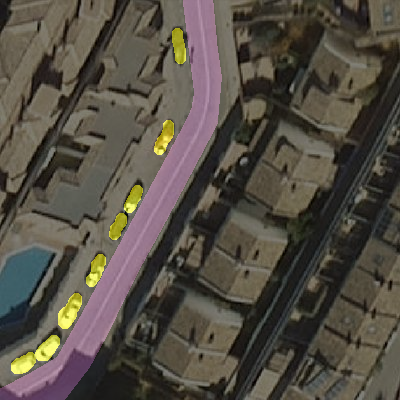



Imagen: granada64.jpg  | Máscara: granada64.png



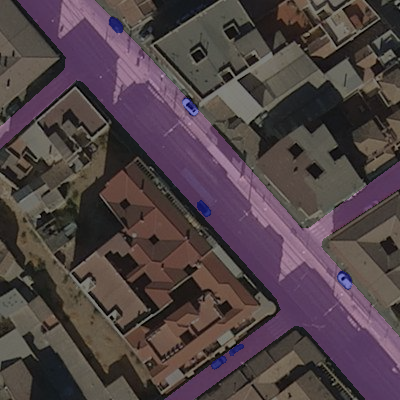



Imagen: granada10.jpg  | Máscara: granada10.png



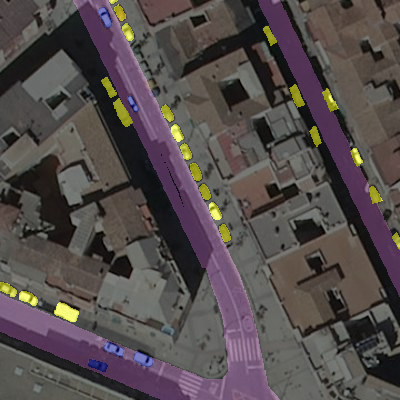



Imagen: granada70.jpg  | Máscara: granada70.png



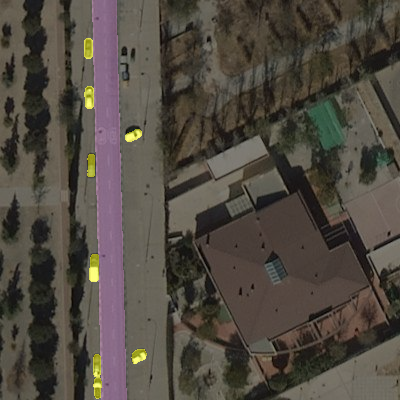



Imagen: granada4.jpg  | Máscara: granada4.png



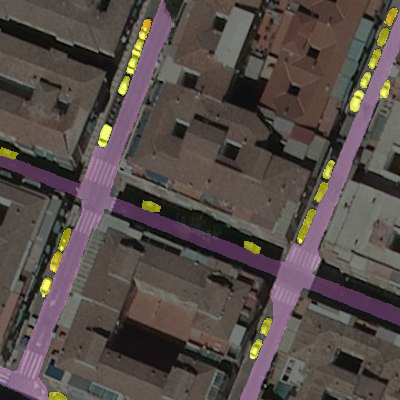



Imagen: granada41.jpg  | Máscara: granada41.png



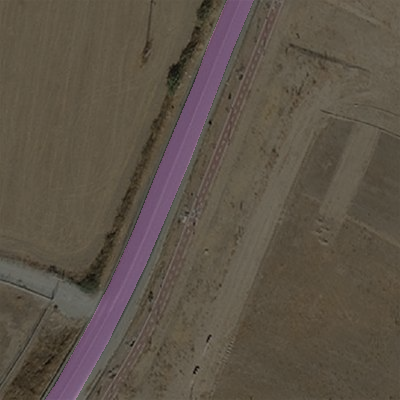



Imagen: granada86.jpg  | Máscara: granada86.png



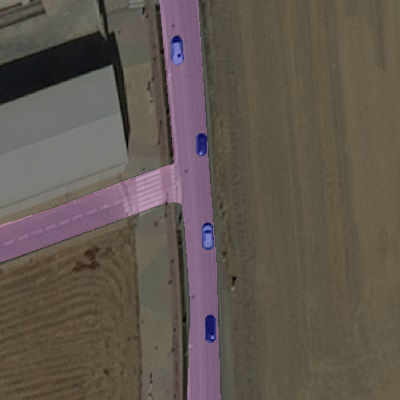



Imagen: granada5.jpg  | Máscara: granada5.png



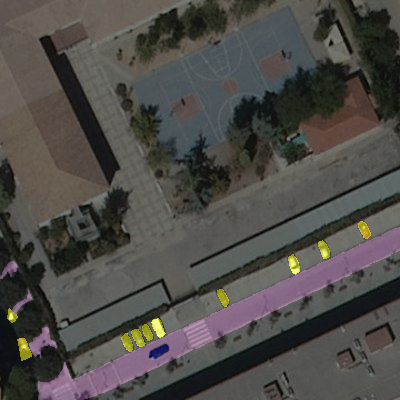



Imagen: granada25.jpg  | Máscara: granada25.png



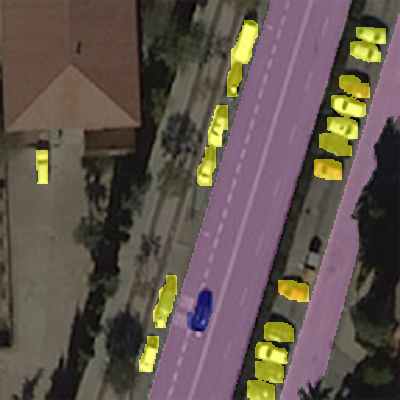



Imagen: granada7.jpg  | Máscara: granada7.png



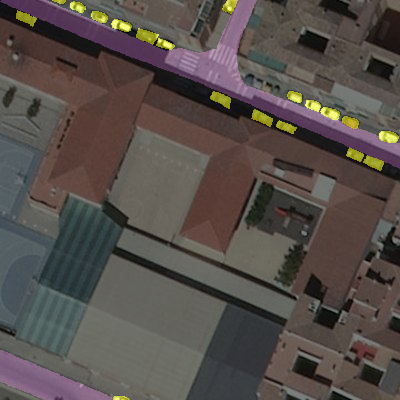

In [ ]:
folder_src = '/content/drive/MyDrive/GranadaAerial/train/src'
folder_gt = '/content/drive/MyDrive/GranadaAerial/train/gt'
overlay_masks(folder_src, folder_gt)